In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

### Load Dataset

In [52]:
df = pd.read_csv('./Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8999,9000,15810910,Royston,702,Spain,Female,38,9,0.00,2,1,1,158527.45,0
7261,7262,15734578,Craig,726,France,Female,53,1,113537.73,1,0,1,28367.21,0
4717,4718,15580487,Martin,627,Germany,Male,38,8,106922.92,2,0,1,84270.09,0
4731,4732,15622230,Cribb,705,France,Female,35,3,0.00,2,0,1,66331.01,0
6917,6918,15640418,Omeokachie,649,Germany,Female,41,4,115897.73,1,1,0,143544.48,0


In [3]:
df.shape

(10000, 14)

### Check Null Values

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dropping unnecessary Columns

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
df1 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [7]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Ploting Histogram against different features

In [9]:
class_0 = df1[df1.Exited == 0]
class_1 = df1[df1.Exited == 1]

len(class_0), len(class_1)

(7963, 2037)

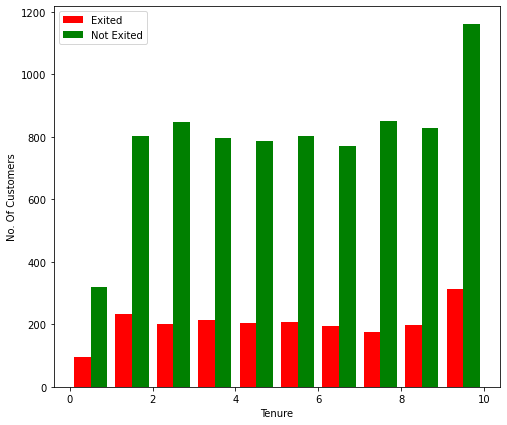

In [10]:
tenure_exited_no = class_0.Tenure
tenure_exited_yes = class_1.Tenure

plt.figure(figsize=(8,7))
plt.hist([tenure_exited_yes, tenure_exited_no], label=['Exited', 'Not Exited'], color=['red', 'green'])
plt.xlabel('Tenure')
plt.ylabel('No. Of Customers')
plt.legend()

### One-Hot encoding Categorical Columns

In [11]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtype == 'object':
            print(f'{col} : {df[col].unique()}')

In [12]:
print_unique_col_values(df1)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [13]:
df1.Gender.replace({'Male':0, 'Female':1}, inplace=True)

In [14]:
df2 = pd.get_dummies(data=df1, columns=['Geography'])

In [15]:
df2.drop('Geography_Spain', axis=1,inplace=True)

### Scaling Data

In [18]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0


In [19]:
cols_to_scale=['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [22]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,1,0.324324,2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,1,0.310811,1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,1,0.324324,8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,1,0.283784,1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,1,0.337838,2,0.500246,1,1,1,0.395400,0,0,0


### Spliting Train and Test Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df2.drop('Exited', axis=1)
y = df2.Exited

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape, X_test.shape

((8000, 11), (2000, 11))

### Creating a Model

In [53]:
def ANN(X_train, y_train, X_test, y_test, epcs):
    
    model = keras.Sequential([
        keras.layers.Dense(100, input_shape=(11,), activation='relu'),
        keras.layers.Dense(120, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epcs)
    
    print("Model Evaluation : ")
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [29]:
y_preds = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.4814 - accuracy: 0.7955
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4407 - accuracy: 0.8133
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8221
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8279
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8367
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8419
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3682 - accuracy: 0.8451
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8462
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3581 - accuracy: 0.8510
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3560 - accura

In [37]:
y_preds

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

### Confusion Matrix

In [38]:
cm = confusion_matrix(y_test, y_preds)

Text(33.0, 0.5, 'Truth')

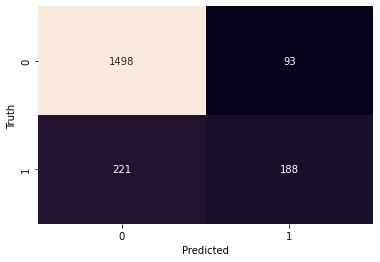

In [39]:
sn.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Handle Imbalanced Dataset

### 1. SMOTE

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [42]:
smote = SMOTE(sampling_strategy='minority')

In [43]:
X_sm, y_sm = smote.fit_resample(X,y)

In [44]:
X_sm.shape, y_sm.shape

((15926, 11), (15926,))

In [45]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

#### Spliting Train and Test Data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)

In [47]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [48]:
y_test.value_counts()

1    1593
0    1593
Name: Exited, dtype: int64

In [49]:
y_predictions = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
399/399 [==============================] - 3s 3ms/step - loss: 0.6061 - accuracy: 0.6670
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 0.5325 - accuracy: 0.7288
Epoch 3/100
399/399 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.7471
Epoch 4/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.7564
Epoch 5/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4781 - accuracy: 0.7669
Epoch 6/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4668 - accuracy: 0.7772
Epoch 7/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4591 - accuracy: 0.7781
Epoch 8/100
399/399 [==============================] - 1s 3ms/step - loss: 0.4532 - accuracy: 0.7831
Epoch 9/100
399/399 [==============================] - 1s 4ms/step - loss: 0.4468 - accuracy: 0.7886
Epoch 10/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4422 - accura

In [57]:
y_predictions[:5]

array([0., 0., 1., 0., 0.], dtype=float32)

#### Confusion Matrix & Classification Report

In [58]:
cm = confusion_matrix(y_test, y_predictions)

Text(33.0, 0.5, 'Truth')

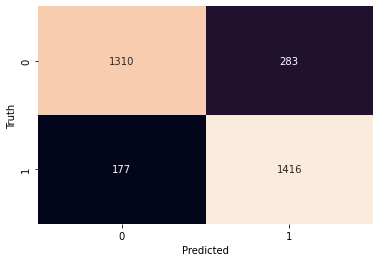

In [59]:
sn.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### 2. Ensemble

In [128]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [130]:
y_train.value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

In [131]:
6370/3

2123.3333333333335

In [132]:
df2 = X_train.copy()
df2['Exited'] = y_train

In [133]:
class_0 = df2[df2['Exited'] == 0]
class_1 = df2[df2['Exited'] == 1]

In [134]:
len(class_0), len(class_1)

(6370, 1630)

In [114]:
def get_train_batch(df_majority, df_minority, start, end):
    
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train = df_train.drop('Exited', axis=1)
    y_train = df_train['Exited']
    
    return X_train, y_train

In [137]:
X_train, y_train = get_train_batch(class_0, class_1, 0, 1630)
y_preds_1 = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.6602 - accuracy: 0.6071
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.6592
Epoch 3/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.6844
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5651 - accuracy: 0.7067
Epoch 5/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5396 - accuracy: 0.7288
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5321 - accuracy: 0.7328
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7387
Epoch 8/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5032 - accuracy: 0.7571
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4995 - accuracy: 0.7583
Epoch 10/100
102/102 [==============================] - 0s 3ms/step - loss: 0.4991 - accura

In [140]:
X_train, y_train = get_train_batch(class_0, class_1, 1630, 1630*2)
y_preds_2 = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.6616 - accuracy: 0.6095
Epoch 2/100
102/102 [==============================] - 0s 4ms/step - loss: 0.6209 - accuracy: 0.6571
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5897 - accuracy: 0.6908
Epoch 4/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7046
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7279
Epoch 6/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5309 - accuracy: 0.7322
Epoch 7/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5232 - accuracy: 0.7429
Epoch 8/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7417
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5096 - accuracy: 0.7497
Epoch 10/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4983 - accura

In [141]:
X_train, y_train = get_train_batch(class_0, class_1, 1630*2, 1630*3)
y_preds_3 = ANN(X_train, y_train, X_test, y_test, 100)

Epoch 1/100
102/102 [==============================] - 1s 3ms/step - loss: 0.6556 - accuracy: 0.6126
Epoch 2/100
102/102 [==============================] - 0s 3ms/step - loss: 0.6228 - accuracy: 0.6509
Epoch 3/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5909 - accuracy: 0.6963
Epoch 4/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.7067
Epoch 5/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5446 - accuracy: 0.7209
Epoch 6/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7359
Epoch 7/100
102/102 [==============================] - 0s 3ms/step - loss: 0.5220 - accuracy: 0.7463
Epoch 8/100
102/102 [==============================] - 0s 4ms/step - loss: 0.5038 - accuracy: 0.7583
Epoch 9/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4976 - accuracy: 0.7626
Epoch 10/100
102/102 [==============================] - 0s 4ms/step - loss: 0.4893 - accura

In [142]:
y_pred_final = y_preds_1.copy()

for i in range(len(y_pred_final)):
    n_ones = y_preds_1[i] + y_preds_2[i] + y_preds_3[i]
    
    if n_ones > 1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [143]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1593
           1       0.50      0.68      0.58       407

    accuracy                           0.80      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.83      0.80      0.81      2000

